## Load Requirements

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

## Data Preprocessing

In [4]:
data_dir = Path(r'C:\Users\luke1\Desktop\projects\T-brain-SinoPac-AIGO\data\training_data.csv')
df = pd.read_csv(data_dir)
data_columns = {
    'ID': 'ID',
    '縣市': 'City',
    '鄉鎮市區': 'District',
    '路名': 'Street_Name',
    '土地面積': 'Land_Area',
    '使用分區': 'Zoning',
    '移轉層次': 'Transfer_Level',
    '總樓層數': 'Total_Floors',
    '主要用途': 'Primary_Use',
    '主要建材': 'Primary_Construction_Material',
    '建物型態': 'Building_Type',
    '屋齡': 'Age_of_Building',
    '建物面積': 'Building_Area',
    '車位面積': 'Parking_Area',
    '車位個數': 'Number_of_Parking_Spaces',
    '橫坐標': 'Longitude',
    '縱坐標': 'Latitude',
    '備註': 'Remarks',
    '主建物面積': 'Main_Building_Area',
    '陽台面積': 'Balcony_Area',
    '附屬建物面積': 'Auxiliary_Building_Area',
    '單價': 'Unit_Price'
    }



df = df.rename(columns=data_columns)
df=df.drop(["ID", "Longitude","Latitude", "Remarks", "Street_Name"], axis=1)
# df['Address'] = df['City'] + df['District'] + df['Street_Name']
# print(df)
# print(df['Total_Floors'].head(30))
import pandas as pd

# Step 1a: Handling Missing Values
# Assuming df is your dataframe
numerical_cols = ['Land_Area', 'Age_of_Building', 'Building_Area', 'Parking_Area', 'Main_Building_Area', 'Balcony_Area', 'Auxiliary_Building_Area']
categorical_cols = ['Zoning', 'Transfer_Level', 'Total_Floors', 'Primary_Use', 'Primary_Construction_Material', 'Building_Type', 'Number_of_Parking_Spaces', 'City', 'District']

# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# Step 1b: Encoding Categorical Variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Now, df_encoded contains all numerical data for modeling.

# Step 2a: Creating Relevant Features
# For example, create a new feature 'Unit_Price_Per_Square_Meter'
# df_encoded['Unit_Price_Per_Square_Meter'] = df_encoded['Unit_Price'] / df_encoded['Building_Area']



## Basic Train

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Step 3: Model Selection
X = df_encoded.drop('Unit_Price', axis=1)
y = df_encoded['Unit_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], 
                                   max_depth=best_params['max_depth'], 
                                   min_samples_split=best_params['min_samples_split'], 
                                   random_state=42)
best_model.fit(X_train, y_train)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

## Result

1491    2.613362
9899    1.723299
1430    1.137732
4762    2.707053
3704    2.449403
          ...   
957     2.332290
3329    1.278268
5350    1.676454
6400    2.121485
3578    1.606186
Name: Unit_Price, Length: 2351, dtype: float64


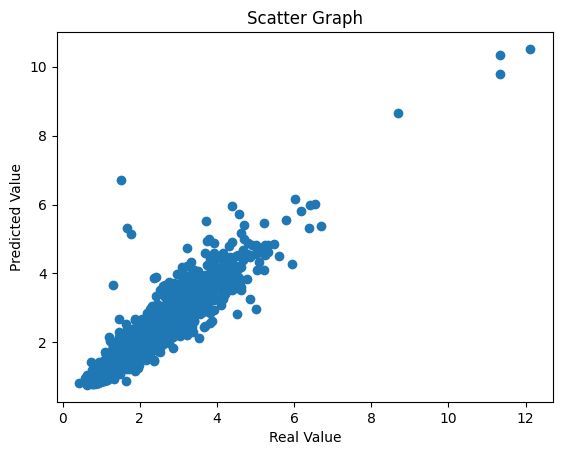

Mean Squared Error: 0.124396356262373
Mean Absolute Error: 0.2226259212336311
Root Mean Squared Error: 0.35269867629801643
R-squared: 0.8754397180799687


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 4a: Split the Data (if not done already in Step 3)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4b: Model Training (assuming you have chosen the best model from Step 3)
# best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], 
#                                    max_depth=best_params['max_depth'], 
#                                    min_samples_split=best_params['min_samples_split'], 
#                                    random_state=42)
# best_model.fit(X_train, y_train)

# Step 4c: Model Evaluation
# Make predictions on the test data
predictions = best_model.predict(X_test)

import matplotlib.pyplot as plt
plt.title("Scatter Graph")          
plt.scatter(y_test, predictions)
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.show()

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Additional: R-squared (coefficient of determination) can also be calculated
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


## Dump model

In [8]:
import joblib
import json

feature_names = df_encoded.columns.tolist()

# Save the model to a file
joblib.dump(best_model, r'output/random_forest_model.pkl')

# Save the list of feature names as a JSON file
with open(r'output/feature_names.json', 'w') as f:
    json.dump(feature_names, f)

print("Model and feature names saved successfully!")


Model and feature names saved successfully!


## Read Public Data

In [9]:
df_public = pd.read_csv(r'data\public_dataset.csv')

df_public = df_public.rename(columns=data_columns)

df_result = df_public['ID']
ddf_publicf=df_public.drop(["ID", "Longitude","Latitude", "Remarks"], axis=1)
df_public = df_public.drop(columns=['Street_Name'])
import pandas as pd

# Step 1a: Handling Missing Values
# Assuming df is your dataframe
numerical_cols = ['Land_Area', 'Age_of_Building', 'Building_Area', 'Parking_Area', 'Main_Building_Area', 'Balcony_Area', 'Auxiliary_Building_Area']
# categorical_cols = ['Zoning', 'Transfer_Level', 'Total_Floors', 'Primary_Use', 'Primary_Construction_Material', 'Building_Type', 'Number_of_Parking_Spaces', 'Address']
categorical_cols = ['Zoning', 'Transfer_Level', 'Total_Floors', 'Primary_Use', 'Primary_Construction_Material', 'Building_Type', 'Number_of_Parking_Spaces', 'City', 'District']

# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    df_public[col] = df_public[col].fillna(df_public[col].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    df_public[col] = df_public[col].fillna(df_public[col].mode().iloc[0])

# Step 1b: Encoding Categorical Variables
df_public_encoded = pd.get_dummies(df_public, columns=categorical_cols)

# Now, df_encoded contains all numerical data for modeling.




# Step 2a: Creating Relevant Features
# For example, create a new feature 'Unit_Price_Per_Square_Meter'
# df_public_encoded['Unit_Price_Per_Square_Meter'] = df_public_encoded['Unit_Price'] / df_public_encoded['Building_Area']



## Predict

In [10]:
# Assuming you have a trained Random Forest model: best_rf_model
# Assuming you have new data encoded and stored in df_public_encoded

# Get the feature columns used during training
training_features = X_train.columns

# Ensure the feature columns in the new data match the training feature columns
# This step will add missing columns to df_public_encoded, if any
for feature in training_features:
    if feature not in df_public_encoded.columns:
        df_public_encoded[feature] = 0  # Add missing feature columns with default value (can be 0 or any appropriate value)

# Reorder columns to match the training data
df_public_encoded = df_public_encoded[X_train.columns]

# Make predictions on the new data
predictions_public = best_model.predict(df_public_encoded)

# Print or use predictions_public as needed
print(predictions_public)


[1.75453075 1.69100394 2.62142391 ... 2.39516788 2.51716639 2.31022376]


## Save file

In [11]:
predictions_column = pd.DataFrame(predictions_public, columns=['predicted_price'])
df_result = pd.concat([df_result, predictions_column], axis=1)
print(df_result)
df_result.to_csv(r'output/result.csv', index=False)

           ID  predicted_price
0        PU-1         1.754531
1        PU-2         1.691004
2        PU-3         2.621424
3        PU-4         1.547206
4        PU-5         3.654943
...       ...              ...
5871  PU-5872         1.374515
5872  PU-5873         1.886579
5873  PU-5874         2.395168
5874  PU-5875         2.517166
5875  PU-5876         2.310224

[5876 rows x 2 columns]
